## Statistics

## 1. What is Statistics?

There are two types of statistics:<br>
1. Descriptive : Describing collected data
2. Inferential : Makes inferences about population as whole

## 2. Descriptive Statistics

Numbers that are most indicative of a set of numbers
1. Average : Population mean $\mu = \frac{\sum_{i=1}^{n} x_{i}}{n}$
2. Median
3. Mode

## 3. Population Data Variability

Most commonly used are:<br>
1. Average : Population mean $\mu = \frac{\sum_{i=1}^{n} x_{i}}{n}$
2. Variance : $\sigma^{2}$ = $\frac{\sum_{i=1}^{n} (x_{i} - \mu)^{2}}{n}$
3. Standard variation : $\sqrt{variance}$ = $\sqrt{\sigma^{2}}$ = $\sigma$
    * Because we take square root, we are able to get a scale of comparison in the same unit
4. Z-score : $\frac{x - \bar{x}}{\sigma}$, which tells how far away the observed value is from the mean. **Note that z-score is not necessarily restricted to a normal distribution**
    
## 4. Sample Data Variability

1. Average : Population mean $\bar{x} = \frac{\sum_{i=1}^{n} x_{i}}{n}$
2. Variance : $s^{2}$ = $\frac{\sum_{i=1}^{n} (x_{i} - \mu)^{2}}{n-1}$
3. Standard variation : $\sqrt{variance}$ = $\sqrt{s^{2}}$ = $s$

## 5. Normal Distribution

**Empirical Rule** : In a normal distribution <br>
1. the probability of finding a result **one standard deviation above and below the mean** is **68%**
2. the probability of finding a result **two standard deviation above and below the mean** is **95%**
3. the probability of finding a result **three standard deviation above and below the mean** is **99.7%**

## 6. Standard Normal Distribution

* $\mu = 0$ and $\sigma = 1$
* Mean is **0** and standard deviation is **1**
* The empirical rule of normal distribution still holds true

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=None

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
state_pop_dataset = pd.read_csv('state-population.csv')
state_pop_dataset.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [4]:
dataset = pd.read_csv('murders.csv')
dataset.head()

,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


In [5]:
german_dataset = pd.read_csv('german_dataset.csv',  index_col=0)
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [6]:
housing_data = pd.read_csv('housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 5. Central Limit Theorem

**The Central Limit Theorem (CLT)** is a statistical theory states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

In [7]:
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (10,20)

Text(0.5, 1.0, 'Sample mean of 100 data points : 1000 samples')

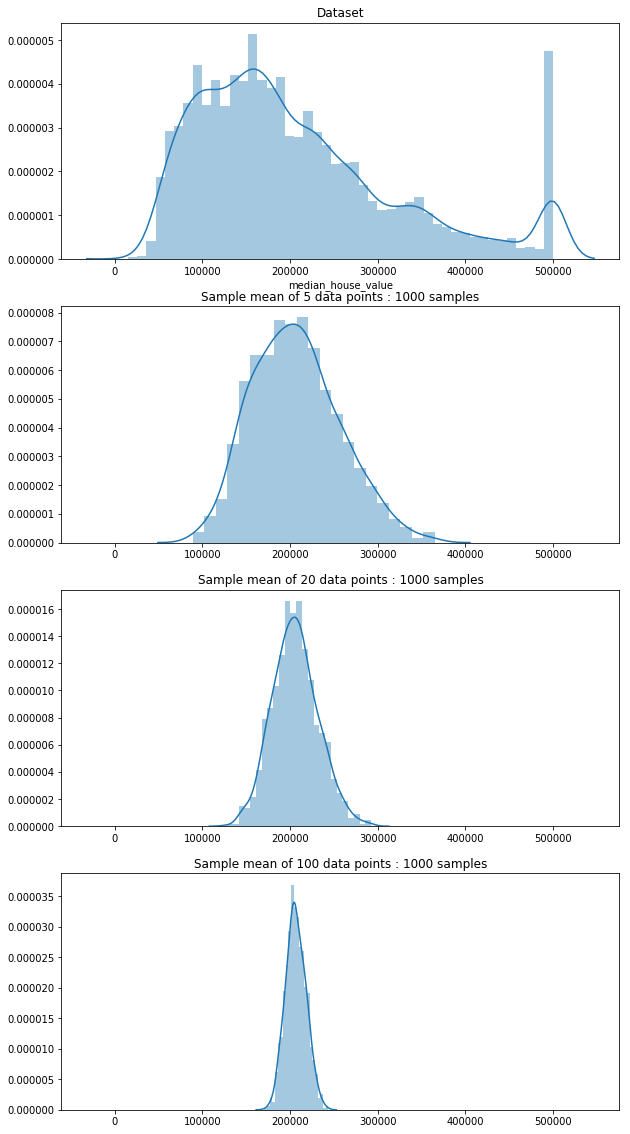

In [8]:
ax1 = plt.subplot(411) #create a plot field of one column and four rows
sns.distplot(housing_data['median_house_value'])
plt.title('Dataset')

sample_5 = []
for _ in range(1000):
    sample_5.append(housing_data.median_house_value.sample(5).mean()) #use sample function (this is random)
ax2 = plt.subplot(412, sharex= ax1)
sns.distplot(sample_5)
plt.title('Sample mean of 5 data points : 1000 samples')

sample_20 = []
for _ in range(1000):
    sample_20.append(housing_data.median_house_value.sample(20).mean())
ax3 = plt.subplot(413, sharex = ax1)
sns.distplot(sample_20)
plt.title('Sample mean of 20 data points : 1000 samples')


sample_100 = []
for _ in range(1000):
    sample_100.append(housing_data.median_house_value.sample(100).mean())
ax4 = plt.subplot(414, sharex = ax1)
sns.distplot(sample_100)
plt.title('Sample mean of 100 data points : 1000 samples')

sample mean만큼 sample mean의 variation도 중요하다 -> 즉, standard error<br>
sample mean의 평균을 구하고 분산(variance)을 구한다

In [25]:
print('dataset의 median :', state_pop_dataset.population.median())

dataset의 median : 1597005.0


In [26]:
# (미국 인구 데이터) 부트스트랩 분포
state_pop_sample_meds = []
# 100개의 data가 1개의 sample set이다. 총 500번 반복
for _ in range(500):
    samp_med = state_pop_dataset.population.sample(100, replace=True).median()
    state_pop_sample_meds.append(samp_med)

In [28]:
print('bootstrap median :', np.mean(state_pop_sample_meds))
print('bootstrap median의 표준오차(변동성) :', np.std(state_pop_sample_meds)) #standard error의 근사값

bootstrap median : 1691121.343
bootstrap median의 표준오차(변동성) : 338878.47736636334


**(예제) 캘리포니아 지역의 평균 집 값에 대한 90% 신뢰구간을 부트스트랩을 이용하여 구하라.**

In [32]:
house_prices = []
for _ in range(1000):
    mean_price = housing_data.median_house_value.sample(50, replace=True).mean()
    house_prices.append(mean_price)

house_prices

[161588.04,
 223498.1,
 234502.08,
 221896.06,
 209606.04,
 216568.04,
 190450.06,
 184846.02,
 199832.02,
 224406.08,
 203764.02,
 206788.04,
 198080.02,
 201840.02,
 197638.04,
 223728.06,
 207540.04,
 216586.06,
 185994.04,
 215080.04,
 189958.0,
 177370.02,
 218138.06,
 213654.08,
 200692.06,
 205630.04,
 193986.04,
 226406.06,
 196380.02,
 194570.06,
 221064.06,
 211236.06,
 181208.02,
 200578.06,
 214126.08,
 195914.04,
 196150.02,
 188934.02,
 218894.06,
 198830.02,
 211928.04,
 217074.06,
 197222.06,
 203510.1,
 206922.08,
 212070.04,
 193858.04,
 188450.02,
 196836.08,
 237658.12,
 183288.04,
 243856.12,
 204458.02,
 197878.04,
 220374.06,
 208496.1,
 206506.06,
 214164.0,
 241872.1,
 212462.06,
 209804.06,
 188294.0,
 202760.06,
 225498.08,
 199838.06,
 235326.02,
 208496.04,
 194946.02,
 220268.0,
 263180.16,
 179162.0,
 211856.08,
 181474.04,
 219506.08,
 206296.0,
 217184.06,
 196338.02,
 210372.04,
 189856.04,
 195600.06,
 191404.02,
 196176.04,
 206136.08,
 190992.04,
 2

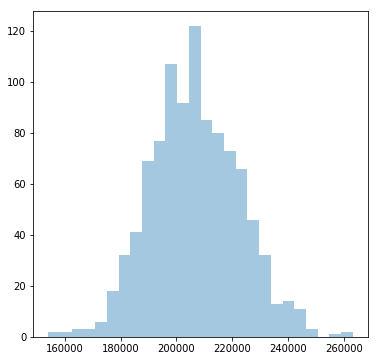

In [33]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.distplot(house_prices, kde=False)

In [36]:
np.mean(house_prices)

206713.05674

In [34]:
# 90% 구간
ci_min = np.percentile(house_prices, 5)
ci_max = np.percentile(house_prices, 95)

print('90% CI lower:', ci_min)
print('90% CI upper:', ci_max)

90% CI lower: 181428.439
90% CI upper: 233099.055


In [40]:
murder = dataset['total']

In [41]:
murder_list = []

for i in range(500):
    _mean = murder.sample(50, replace=True).mean()
    murder_list.append(_mean)

murder_list

[155.76,
 231.48,
 182.98,
 170.14,
 210.58,
 195.74,
 207.62,
 202.66,
 141.14,
 217.4,
 226.74,
 217.3,
 235.12,
 144.44,
 177.48,
 224.52,
 177.38,
 181.2,
 171.5,
 180.04,
 168.18,
 171.0,
 179.92,
 188.34,
 226.02,
 196.7,
 190.84,
 192.72,
 132.38,
 200.06,
 225.56,
 232.2,
 223.12,
 157.06,
 161.66,
 164.24,
 200.8,
 167.04,
 160.1,
 193.12,
 157.56,
 265.18,
 217.36,
 168.02,
 163.54,
 152.6,
 245.9,
 223.94,
 249.96,
 217.9,
 143.8,
 145.64,
 134.26,
 217.44,
 200.24,
 204.26,
 174.02,
 152.72,
 238.0,
 176.2,
 199.2,
 220.48,
 133.3,
 153.68,
 204.02,
 254.78,
 155.56,
 175.3,
 142.38,
 170.7,
 190.34,
 158.42,
 199.14,
 215.92,
 165.34,
 238.6,
 177.92,
 204.56,
 187.42,
 140.32,
 174.6,
 188.58,
 254.58,
 184.74,
 172.52,
 143.3,
 187.64,
 168.72,
 161.6,
 181.9,
 150.82,
 159.1,
 92.82,
 149.74,
 214.56,
 158.44,
 230.22,
 143.12,
 207.3,
 208.98,
 238.08,
 169.0,
 159.14,
 229.54,
 192.98,
 221.2,
 169.7,
 227.0,
 340.68,
 181.48,
 170.7,
 250.9,
 224.82,
 233.88,
 188.1,

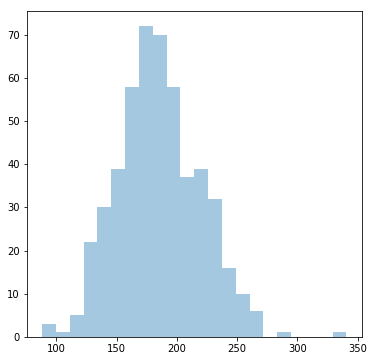

In [42]:
sns.distplot(murder_list, kde=False)

In [44]:
display(np.percentile(murder_list, 5))
display(np.percentile(murder_list, 95))

132.12599999999998

239.88399999999993

In [48]:
np.mean(murder)

184.37254901960785

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np

web_page_data = pd.read_csv('web_page_data.csv')
web_page_data.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


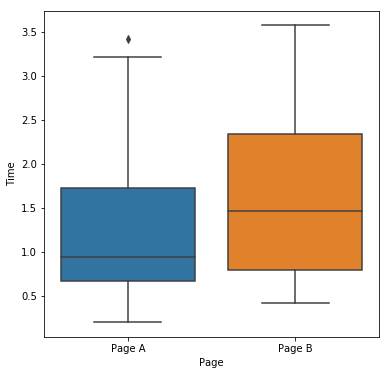

In [57]:
sns.boxplot(x='Page', y='Time', data=web_page_data)

In [58]:
mean_a = web_page_data[web_page_data['Page'] == 'Page A']['Time'].mean()
mean_b = web_page_data[web_page_data['Page'] == 'Page B']['Time'].mean()

display(mean_a)
display(mean_b)

1.263333333333333

1.62

In [59]:
(mean_b - mean_a) * 60

21.400000000000027

In [64]:
random_generator = np.random.RandomState(42)

# Permutation means (difference between mean_a and mean_b)
pm = []

# group A's size
len_a = len(web_page_data[web_page_data['Page'] == 'Page A'])
# 전체 인덱스 크기
total_indice = np.arange(len(web_page_data))

for _ in range(1000):
    # 인덱스를 복사
    copy_indice = total_indice.copy()
    # 그룹에 할당할 데이터를 랜덤하게 추출하기 위해서 섞는다.
    random_generator.shuffle(copy_indice)
    perm_a = web_page_data.iloc[copy_indice[:len_a]]
    perm_b = web_page_data.iloc[copy_indice[len_a:]]
    
    pm.append((perm_b['Time'].mean() - perm_a['Time'].mean()) * 60)

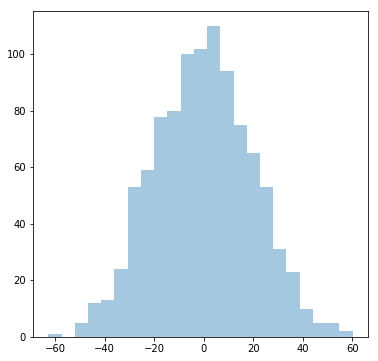

In [66]:
sns.distplot(pm, kde=False)

In [67]:
bowl = np.concatenate([np.ones(382), np.zeros(45945)])
bowl

array([1., 1., 1., ..., 0., 0., 0.])

In [72]:
perm_means = []
for _ in range(1000):
    bowl_copy = bowl.copy()
    random_generator.shuffle(bowl_copy)
    
    perm_a = bowl_copy[:23739]
    perm_b = bowl_copy[23739:]
    
    conversion_a = sum(perm_a) / len(perm_a) * 100
    conversion_b = sum(perm_b) / len(perm_b) * 100
    
    perm_means.append(conversion_a - conversion_b)

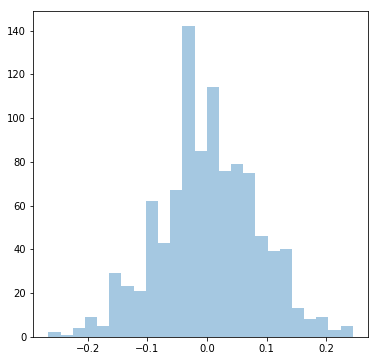

In [75]:
sns.distplot(perm_means, kde=False)

where is 0.0368?

In [81]:
perm_means = np.array(perm_means)

In [84]:
sum(perm_means > 0.0368) / len(perm_means)

0.317

In [85]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([200, 182])
nobs = np.array([23739, 22588])

stat, pval = proportions_ztest(count, nobs, alternative='larger')
pval

0.33094407441560325

In [86]:
rvs1 = web_page_data[web_page_data['Page'] == 'Page A']['Time'].values
rvs2 = web_page_data[web_page_data['Page'] == 'Page B']['Time'].values

from scipy import stats
stats.ttest_ind(rvs1, rvs2) #이것은 two-tail

Ttest_indResult(statistic=-1.1237042154424823, pvalue=0.26901024363926024)